In [2]:
import os
import numpy as np

from IPython.display import Image
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import seaborn as sns
sns.set(font_scale=2)
sns.set_style('ticks')

matplotlib.rcParams.update({'font.size': 16})
matplotlib.rc('axes', titlesize=16)

import torch
import glob
from collections import defaultdict

In [3]:
def get_data(files, *keys):
    """Get data keys from saved digit exps."""
    data = defaultdict(list)
    for f in files:
        d = torch.load(f)
        for k in keys:
           data[k].append(d[k]) 
        
    return data

In [5]:
exp155_files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp155*") 
exp155 = get_data(exp155_files, "correct")

exp157_s01_files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp157_s01_*") 
exp157_s01 = get_data(exp157_s01_files, "correct")

exp157_s02_files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp157_s02_*") 
exp157_s02 = get_data(exp157_s02_files, "correct")

exp158_s03_files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp158_s03_*") 
exp158_s03 = get_data(exp158_s03_files, "correct")

exp158_s035_files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp158_s035_*") 
exp158_s035 = get_data(exp158_s035_files, "correct")

exp158_s04_files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp158_s04_*") 
exp158_s04 = get_data(exp158_s04_files, "correct")

exp157_s05_files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp157_s05_*") 
exp157_s05 = get_data(exp157_s05_files, "correct")

exp157_s06_files = glob.glob("/Users/qualia/Code/glia_playing_atari/data/digits_exp157_s06_*") 
exp157_s06 = get_data(exp157_s06_files, "correct")


In [6]:
exp155

defaultdict(list,
            {'correct': [0.65,
              0.6698,
              0.6726,
              0.687,
              0.6786,
              0.6645,
              0.7206,
              0.6784,
              0.6683,
              0.6844,
              0.6876,
              0.5402,
              0.6789,
              0.6847,
              0.6808,
              0.6459,
              0.679,
              0.6791,
              0.6695,
              0.6871]})

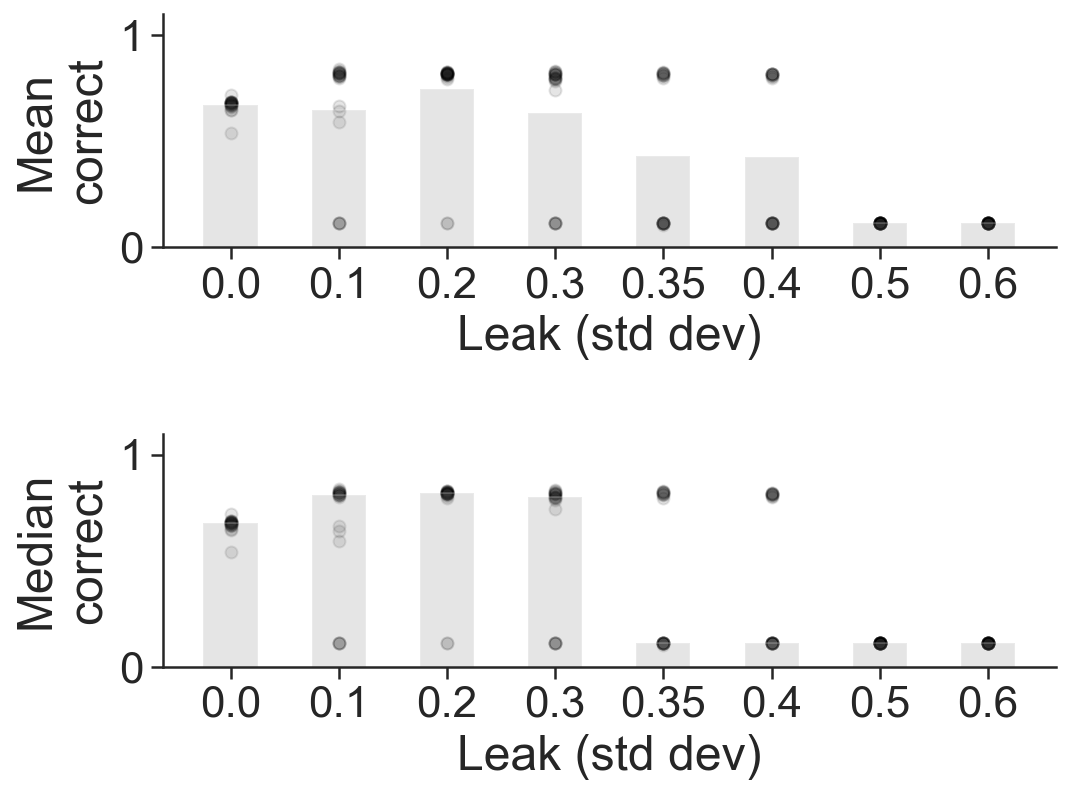

In [21]:
# -------------------------------------------------
# Est stats
model_names = ["0.0","0.1", "0.2", "0.3", "0.35", "0.4", "0.5", "0.6"]
models = [exp155, exp157_s01, exp157_s02, exp158_s03, exp158_s035, exp158_s04, exp157_s05, exp157_s06]
medians = [
    np.median(exp155["correct"]), 
    np.median(exp157_s01["correct"]),
    np.median(exp157_s02["correct"]),
    np.median(exp158_s03["correct"]),
    np.median(exp158_s035["correct"]),
    np.median(exp158_s04["correct"]),
    np.median(exp157_s05["correct"]),
    np.median(exp157_s06["correct"]),
]

means = [
    np.mean(exp155["correct"]), 
    np.mean(exp157_s01["correct"]),
    np.mean(exp157_s02["correct"]),
    np.mean(exp158_s03["correct"]),
    np.mean(exp158_s035["correct"]),
    np.mean(exp158_s04["correct"]),
    np.mean(exp157_s05["correct"]),
    np.mean(exp157_s06["correct"]),
]

# -------------------------------------------------
# Visualize 
fig = plt.figure(figsize=(8, 6))
grid = plt.GridSpec(2, 1, wspace=0.3, hspace=0.8)

# Mean
plt.subplot(grid[0, 0])
plt.bar(model_names, means, color="grey", alpha=0.2, width=0.5)
for name, model in zip(model_names, models):
    plt.scatter(x=np.repeat(name, 20), y=model["correct"], color="black", alpha=0.1)
plt.ylim(0, 1.1)
plt.ylabel("Mean\ncorrect")
plt.xlabel("Leak (std dev)")
_ = sns.despine()

# Median
plt.subplot(grid[1, 0])
plt.bar(model_names, medians, color="grey", alpha=0.2, width=0.5)
for name, model in zip(model_names, models):
    plt.scatter(x=np.repeat(name, 20), y=model["correct"], color="black", alpha=0.1)
plt.ylim(0, 1.1)
plt.ylabel("Median\ncorrect")
plt.xlabel("Leak (std dev)")
_ = sns.despine()